## Comparaison entre les différentes méthodes d'initialisation des poids

Notre projet consiste a établir une comparaison des performences des différentes méthodes d'initialisation et leurs effet sur l'accuracy de notre modèle.

Et pour cela , on a utilisé une dataset nommée "Pima" de UCI Machine Learning repository ( https://archive.ics.uci.edu/ml ) et qui décrit les données des dossiers médicaux des patients indiens et qui indique si leur diabète a commencé à apparaître chez le patient dans les cinq ans qui suivent , en effet notre dataset contient 8 variables explicatifs qui contient des informations sur le patient(age , niveau d'insulin , tension , ...) et une variable cible qui est une variables binaire(0 ou 1) et qui désigne si le patient va avoir de la diabète dans les cinq ans qui suivent (1) et (0) sinon. 

Donc on est dans un problème de classification binaire ce qui va définir l'architecture de notre réseau de neurones où on va utilisé la bibliothèque Keras pour implémenter notre réseau de neurones qui est une bibliothèque trés simple et éfficace pour les modèles deep learning et qui offre beaucoup de fonctions qui simplifie l'implémentation .

Tous d'abors on a importé les class d'où on aurais besoin (Sequential et Dense) que on va détaillé par la suite et numpy et pyplot pour bien visualiser les résultats obtenues.

In [3]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
numpy.random.seed(7)

En suite on a chargé notre dataset qui éxiste dans le dossier où se trouve notre fichier python.

In [5]:
dataset = numpy.loadtxt("pima.csv", delimiter=",")

En suite on a divisé notre dataset pour séparer nos variables explicatifs X (Matrice de valeurs numériques) et notre variable cible Y(Tableau de valeurs binaire 0 ou 1)

In [6]:
X = dataset[:,0:8]

In [7]:
Y = dataset[:,8]

En effet , Les modèles dans Keras sont définis comme une séquence de Layers où on doit créer notre modèle qui est un objet 
de la classe Sequential de Keras avec la commande suivante :

In [7]:
model = Sequential()

Keras nous offre de la possibilité d'ajouter autant de couche que on veut on utilisant la fonctions add de la class Sequential et on utilisant la Class Dense qui nous permet de créer un Fully Connected Network tout en précisant le nombre d'input de chaque couche et la méthodes d'initialisation des poids ainsi que la fonction d'activation que on veut utilisé (que on va comparer par la suite , dans notre cas on a utilisé la fonction Relu dans les hidden Layers et la function sigmoid dans la output Layer car on est dans un modèle de classification binère.

In [15]:
#12 unités dans la première hidden layer , 8 entrées (variables explicatifs) , Méthodes d'initialisations ,fonction d'activation)
model.add(Dense(12, input_dim=8, kernel_initializer='glorot_uniform', activation='relu'))

In [16]:
#8 unités dans la deuxième Layer avec une fonction d'activation Relu
model.add(Dense(8, activation='relu'))

In [17]:
#1 unités dans la output Layer avec une fonction d'activation sigmoid pour avoir une probabilité entre 0 et 1 
model.add(Dense(1, activation='sigmoid'))

Ensuite on doit compiler notre modèle (Keras utilisent Tensorflow pour complier le modèle). et pour ceci on doit spécifier comme paramètre :
La fonction de Loss où on a utilisé la fonction (CrossEntropy):−(ylog(p)+(1−y)log(1−p)) (que on a vu durant le cours) .
La méthodes d'optimisation que on veut utilisé (on a choisit la méthodes d'Adam) .
La métrics d'accuracy que on veut obtenir pour évaluer notre modèle.

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Ensuite on va faire apprendre notre modèle en lui donnant comme paramètre notre matrice des entrées et notre tableau qui 
contient la variable cible pour chaque patient tout en précisant le nombre d'itérations et le nombre d'éxemples a traité 
avant de mettre à jours les poids

In [19]:
model.fit(X, Y, epochs=2, batch_size=10)


Epoch 1/2
768/768 [==============================] - 1s 730us/step - loss: 0.6757 - acc: 0.7031
Epoch 2/2
768/768 [==============================] - 0s 127us/step - loss: 0.6456 - acc: 0.7409


Enfin , on arrive a la comparaison de nos méthodes d'initialisation où on va calculer l'accuracy de notre modèle pour chaque
méthodes qui s'agissent de :
* RandomUniform : on génére des poids aléatoires avec des valeurs entre -0.05 et 0.05 d'une distribution normal de ces valeurs .

Pour les autres méthodes on génére les poids avec la formule suivante où seul la constante cte qui différe dans chaque méthodes :

                                np.random.randn(input_units, output_units)*cte
                   
* glorot normal, $cte =sqrt( \frac{2}{n_{in}+n_{out}}$) <br><br>
* glorot uniform, $cte = sqrt(\frac{6}{n_{in}+n_{out}}$)<br><br>
* He normal,$cte = sqrt(\frac{2}{n_{in}}$) <br><br>
* He uniform,$cte = sqrt(\frac{6}{n_{in}}$) <br><br>
* LeCun normal, $cte = sqrt(\frac{1}{n_{in}}$)<br><br>
* LeCun uniform, $cte = sqrt(\frac{3}{n_{in}}$)<br><br>


$n_{in}$ représente le nombre des input units et $n_{out}$ le nombre des outputs units dans la couche.<br>

RandomUniform
Epoch 1/15
768/768 [==============================] - 1s 1ms/step - loss: 0.8985 - acc: 0.5469
Epoch 2/15
768/768 [==============================] - 0s 128us/step - loss: 0.6332 - acc: 0.6289
Epoch 3/15
768/768 [==============================] - 0s 165us/step - loss: 0.6105 - acc: 0.6615
Epoch 4/15
768/768 [==============================] - 0s 157us/step - loss: 0.6313 - acc: 0.6654
Epoch 5/15
768/768 [==============================] - 0s 150us/step - loss: 0.6050 - acc: 0.6654
Epoch 6/15
768/768 [==============================] - 0s 147us/step - loss: 0.6081 - acc: 0.6667
Epoch 7/15
768/768 [==============================] - 0s 155us/step - loss: 0.5984 - acc: 0.6602
Epoch 8/15
768/768 [==============================] - 0s 134us/step - loss: 0.6009 - acc: 0.6654
Epoch 9/15
768/768 [==============================] - 0s 149us/step - loss: 0.6021 - acc: 0.6589
Epoch 10/15
768/768 [==============================] - 0s 158us/step - loss: 0.5913 - acc: 0.6732
Epoch 11/15
768/7

768/768 [==============================] - 0s 160us/step - loss: 1.5120 - acc: 0.5716
Epoch 7/15
768/768 [==============================] - 0s 133us/step - loss: 1.2589 - acc: 0.5807
Epoch 8/15
768/768 [==============================] - 0s 151us/step - loss: 0.9996 - acc: 0.5911
Epoch 9/15
768/768 [==============================] - 0s 149us/step - loss: 0.9296 - acc: 0.5964
Epoch 10/15
768/768 [==============================] - 0s 131us/step - loss: 0.8694 - acc: 0.6055
Epoch 11/15
768/768 [==============================] - 0s 161us/step - loss: 0.8190 - acc: 0.6146
Epoch 12/15
768/768 [==============================] - 0s 150us/step - loss: 0.7574 - acc: 0.6211
Epoch 13/15
768/768 [==============================] - 0s 143us/step - loss: 0.7327 - acc: 0.6237
Epoch 14/15
768/768 [==============================] - 0s 161us/step - loss: 0.7388 - acc: 0.6211
Epoch 15/15
768/768 [==============================] - 0s 362us/step
lecun_uniform
Epoch 1/15
768/768 [==============================

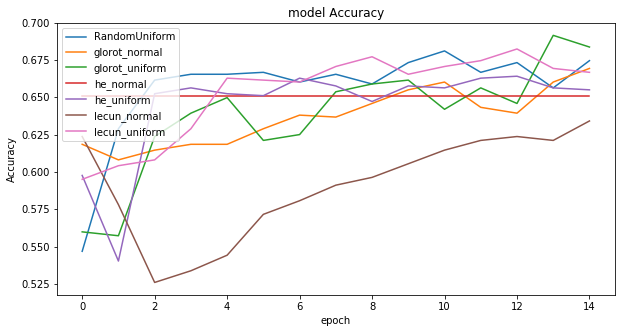

In [11]:
plt.figure(figsize=[10,5])
accuracy = []
initialisation  = ['RandomUniform','glorot_normal','glorot_uniform','he_normal','he_uniform','lecun_normal','lecun_uniform']
for methods in initialisation:
    print(methods)
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer=methods, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X, Y, epochs=15, batch_size=10)
    plt.plot(history.history['acc'])
    scores = model.evaluate(X, Y)
    accuracy.append(scores[1]*100) 
    
    
    
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(initialisation, loc='upper left')

On remarque d'après nos plots qu'il n'éxiste pas une méthode d'initialisation meilleure que d'autres car tous dépend du 
nombre d'épochs choisie où on trouve l'une des méthodes avec une accuracy supérieur à toute les autres méthodes dans certaine 
epoch.

NB : Dans la comparaison Global des méthodes d'initialisations on va faire notre apprentissage sur 15 epochs (nombre max d'epochs que on a choisit)

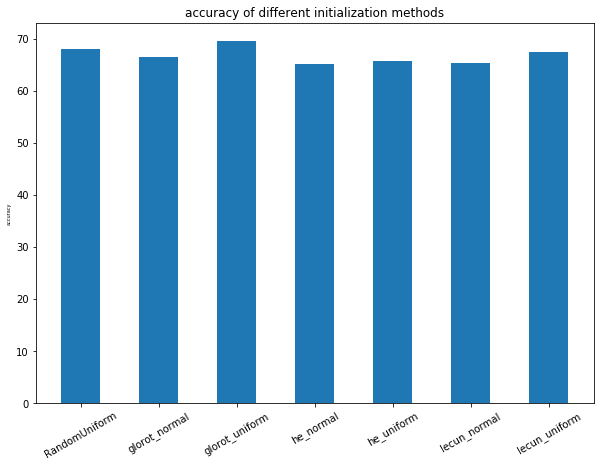

In [12]:
plt.figure(figsize=[10,7])
index = numpy.arange(len(accuracy))
plt.bar(index, accuracy,width=0.5)

plt.ylabel('accuracy', fontsize=5)
plt.xticks(index, initialisation, fontsize=10, rotation=30)
plt.title('accuracy of different initialization methods')

plt.show()


On remarque que dans notre modèle la méthode Glorot Uniform nous donne des bonnes résultats car il possède une accuracy supérieur à toutes les méthodes traités suivie de la méthodes Lecun Uniform qui donne aussi de bonnes résultat avec une accuracy beaucoup plus proche à la méthode Glorot Uniform.

## Conclusion

Durant le cour nous avons constaté que la méthodes de He Normal donne de meilleurs résultats lors de l'utilisation de la fonction d'activation Relu dans notre hidden Layers alors que dans notre comparaison montre qu'il éxiste d'autres méthodes beaucoup plus performentes et qui donnent de meilleur résultat mieux que la méthode He normal dans ce cas (Glorot Uniform , Lecun Uniform , Random Uniform ...) bien évidement dans le modèle que on a définit et avec 15 epochs.